In [17]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

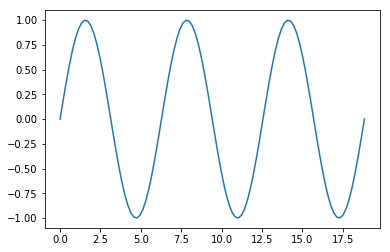

In [18]:
# Make up some data (sine wave)
N = 100
X = np.linspace(0, 6*np.pi, N)
Y = np.sin(X)

plt.plot(X,Y)

In [19]:
def make_poly(X, deg):
    # Adds a column of ones 
    n = len(X)
    data = [np.ones(n)]
    for d in range(deg):
        data.append(X**(d+1))
    return np.vstack(data).T

In [20]:
def fit(X, Y):
    return np.linalg.solve(X.T.dot(X), X.T.dot(Y))

In [24]:
def fit_and_display(X, Y, sample, deg):
    # sample - number of points to take from X,Y to build training set
    N = len(X)
    train_idx = np.random.choice(N, sample)
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]

    plt.title("Random Sample of points")
    plt.scatter(Xtrain, Ytrain)
    plt.show()

    # fit polynomial
    Xtrain_poly = make_poly(Xtrain, deg)
    w = fit(Xtrain_poly, Ytrain)

    # display the polynomial
    X_poly = make_poly(X, deg)
    Y_hat = X_poly.dot(w)
    plt.plot(X, Y)
    plt.plot(X, Y_hat)
    plt.scatter(Xtrain, Ytrain)
    plt.title("deg = %d" % deg)
    plt.show()

In [12]:
def get_mse(Y, Yhat):
    d = Y - Yhat
    return d.dot(d) / len(d)

In [22]:
def plot_train_vs_test_curves(X, Y, sample=20, max_deg=20):
    N = len(X)
    train_idx = np.random.choice(N, sample)
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]

    test_idx = [idx for idx in range(N) if idx not in train_idx]
    # test_idx = np.random.choice(N, sample)
    Xtest = X[test_idx]
    Ytest = Y[test_idx]

    mse_trains = []
    mse_tests = []
    for deg in range(max_deg+1):
        Xtrain_poly = make_poly(Xtrain, deg)
        w = fit(Xtrain_poly, Ytrain)
        Yhat_train = Xtrain_poly.dot(w)
        mse_train = get_mse(Ytrain, Yhat_train)

        Xtest_poly = make_poly(Xtest, deg)
        Yhat_test = Xtest_poly.dot(w)
        mse_test = get_mse(Ytest, Yhat_test)

        mse_trains.append(mse_train)
        mse_tests.append(mse_test)

    plt.plot(mse_trains, label="train mse")
    plt.plot(mse_tests, label="test mse")
    plt.legend()
    plt.show()

    plt.plot(mse_trains, label="train mse")
    plt.legend()
    plt.show()

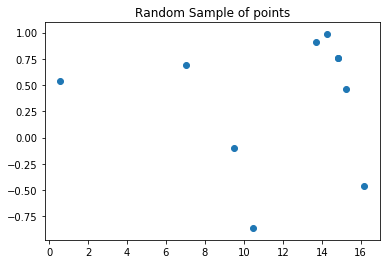

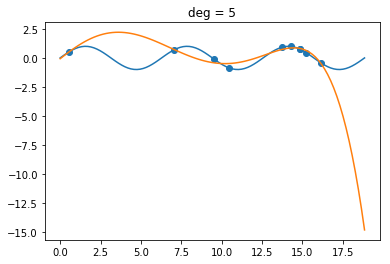

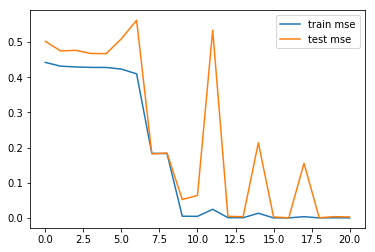

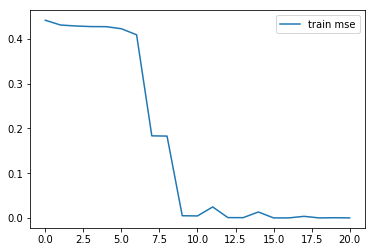

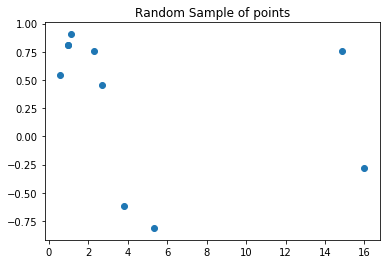

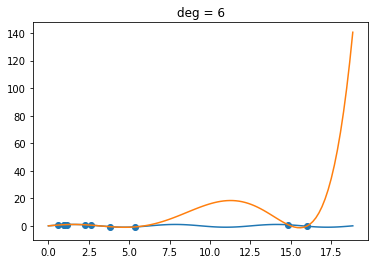

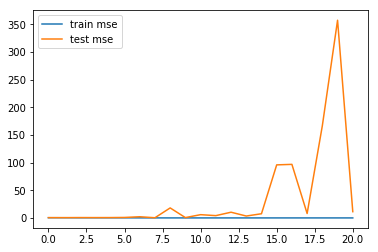

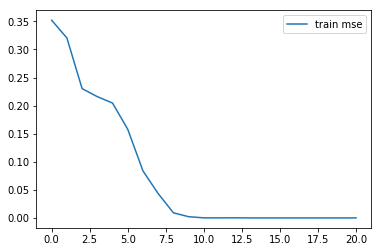

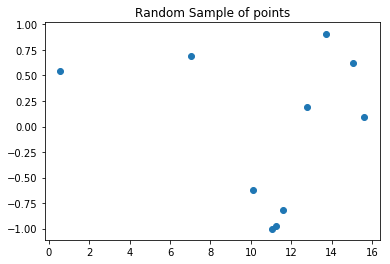

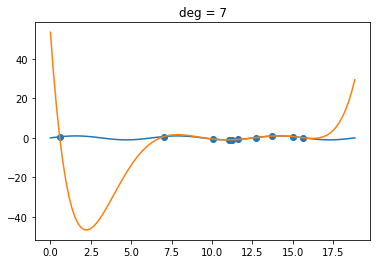

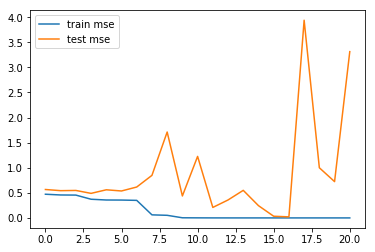

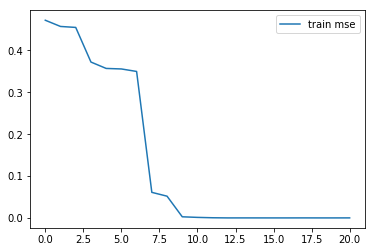

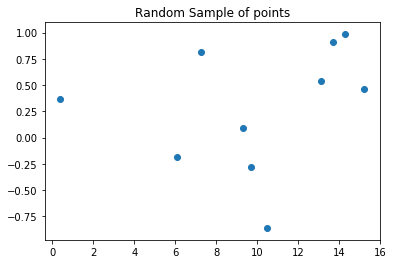

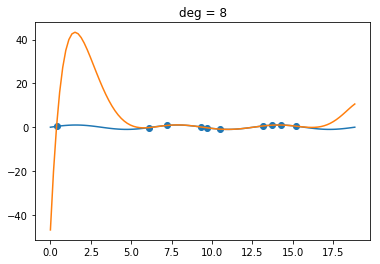

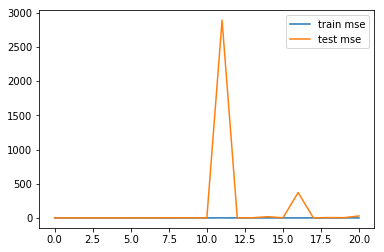

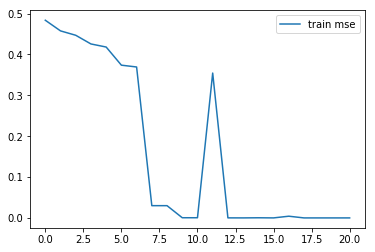

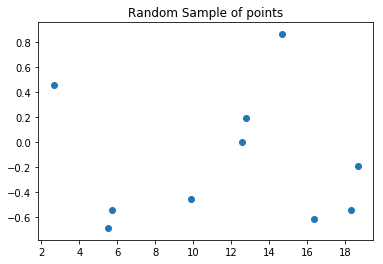

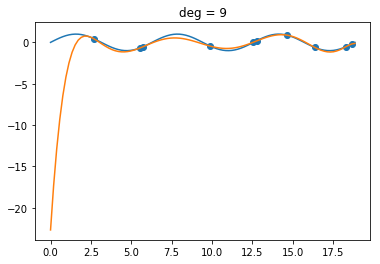

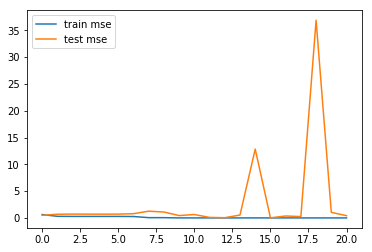

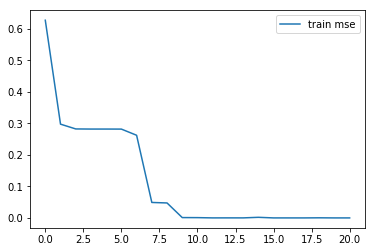

In [25]:
for deg in (5, 6, 7, 8, 9):
    fit_and_display(X, Y, 10, deg)
    plot_train_vs_test_curves(X, Y)